<div class="alert alert-block alert-success">
    <b>L1 and L2 Regularizer:</b>
</div>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_circles, make_moons
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
X = StandardScaler().fit_transform(X)
X_tensor = torch.FloatTensor(X)
y_tensor = torch.LongTensor(y)


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


def train(model, X, y, optimizer, criterion, epochs=1000, l2_lambda=0):
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)

        # Add l2 regularization
        if l2_lambda > 0:
            l2_reg = torch.tensor(0.)
            for param in model.parameters():
                l2_reg += torch.norm(param, 2)
            loss += l2_lambda * l2_reg

        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')

# Train without L2
model_without_l2 = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_without_l2.parameters(), lr=0.01)
train(model_without_l2, X_tensor, y_tensor, optimizer, criterion)    

Epoch 0, Loss: 0.7274022102355957
Epoch 100, Loss: 0.00026188339688815176
Epoch 200, Loss: 9.82198616839014e-05
Epoch 300, Loss: 4.975754927727394e-05
Epoch 400, Loss: 2.984935235872399e-05
Epoch 500, Loss: 1.9836206774925813e-05
Epoch 600, Loss: 1.4115745216258802e-05
Epoch 700, Loss: 1.0556826055108104e-05
Epoch 800, Loss: 8.19296019471949e-06
Epoch 900, Loss: 6.535341981361853e-06


In [9]:
# Train with L2
model_with_l2 = Net()
optimizer = optim.Adam(model_with_l2.parameters(), lr=0.01)
train(model_with_l2, X_tensor, y_tensor, optimizer, criterion, l2_lambda=0.01)

Epoch 0, Loss: 0.8611067533493042
Epoch 100, Loss: 0.13756871223449707
Epoch 200, Loss: 0.12528671324253082
Epoch 300, Loss: 0.12485307455062866
Epoch 400, Loss: 0.12478413432836533
Epoch 500, Loss: 0.12478303909301758
Epoch 600, Loss: 0.1247703954577446
Epoch 700, Loss: 0.12478076666593552
Epoch 800, Loss: 0.12478897720575333
Epoch 900, Loss: 0.12482950836420059


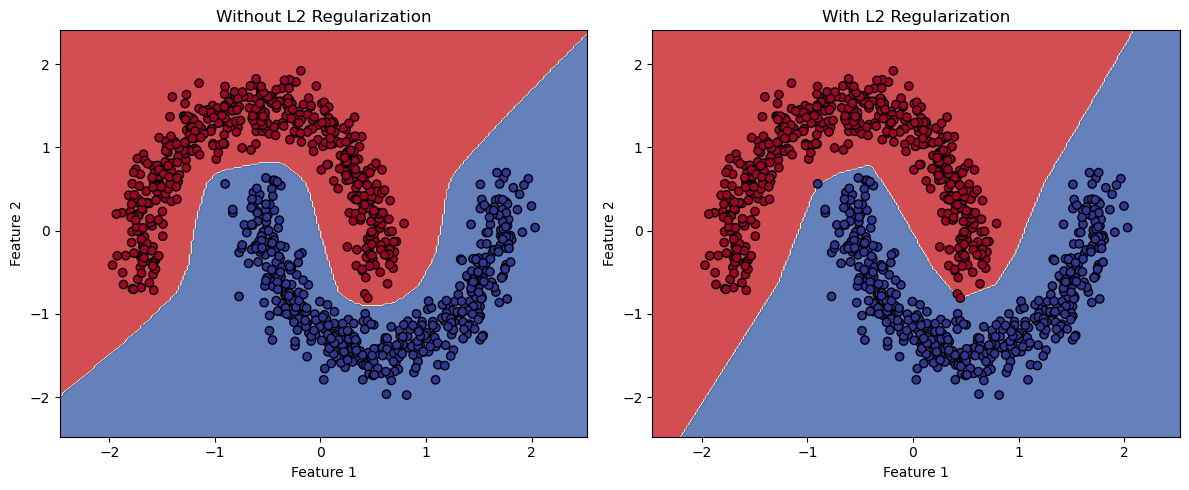

In [10]:
# Plotting function
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])).detach().numpy()
    Z = np.argmax(Z, axis=1).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='black')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

# Plot decision boundaries
plt.figure(figsize=(12, 5))
plt.subplot(121)
plot_decision_boundary(X, y, model_without_l2, 'Without L2 Regularization')
plt.subplot(122)
plot_decision_boundary(X, y, model_with_l2, 'With L2 Regularization')
plt.tight_layout()
plt.show()

In [2]:
import numpy as np

class Layer:
    # layer initialization
    def __init__(self, n_inputs, n_neurons,
                 weight_regularizer_l1=0, weight_regularizer_l2=0,
                 bias_regularizer_l1=0, bias_regularizer_l2=0):
        # initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        # set regularization strength
        self.weight_regularizer_l1 = weight_regularizer_l1
        self.weight_regularizer_l2 = weight_regularizer_l2
        self.bias_regularizer_l1 = bias_regularizer_l1
        self.bias_regularizer_l2 = bias_regularizer_l2

<div class="alert alert-block alert-success">
    <b> Regularization Loss calculation </b>
</div>

In [4]:
class Loss:
    # Regularization loss calculation
    def regularization(self, layer):
        # 0 by default
        regularization_loss = 0
        # L1 regularization
        # Calculate only when factor greater than 0
        if layer.weight_regularizer_l1 > 0:
            regularization_loss += layer.weight_regularizer_l1 * np.sum(np.abs(layer.weights))
        # L2 regularization - weights
        if layer.weight_regularizer_l2 > 0:
            regularization_loss += layer.weight_regularizer_l2 * np.sum(layer.weights * layer.weights)
        # L1 regularization - biases
        if layer.bias_regularizer_l1 > 0:
            regularization_loss += layer.bias_regularizer_l1 * np.sum(np.abs(layer.biases))
        # L2 regularization - biases
        if layer.bias_regularizer_l2 > 0:
            regularization_loss += layer.bias_regularizer_l2 * np.sum(layer.biases * layer.biases)

        return regularization_loss

<div class="alert alert-block alert-success">
    <b> Forward pass with regularization </b>
</div>

In [6]:
# Calculate loss from output of activation2 (softmax activation)
data_loss = loss_function.forward(activation2.output, y)

# Calculate regularization penalty
regularization_loss = loss_function.regularization(dense1) + \
                      loss_function.regularization(dense2)

# Calculate overall loss 
loss = data_loss + regularization_loss

NameError: name 'loss_function' is not defined

In [8]:
# Dense layer
class Layer_Dense:
    # Initialization, forward pass, and other methods should be here
    # Backward pass
    def backward(self, dvalues):
        # gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)

        # Gradients on regularization
        # L1 on weights
        if self.weight_regularizer_l1 > 0:
            dL1 = np.ones_like(self.weights)
            dL1[self.weights < 0] = -1
            self.dweights += self.weight_regularizer_l1 * dL1

        # L2 on weights
        if self.weight_regularizer_l2 > 0:
            self.dweights += 2 * self.weight_regularizer_l2 * self.weights

        # L1 on biases
        if self.bias_regularizer_l1 > 0:
            dL1 = np.ones_like(self.biases)
            dL1[self.biases < 0] = -1
            self.dbiases += self.bias_regularizer_l1 * dL1

        # L2 on biases
        if self.bias_regularizer_l2 > 0:
            self.dbiases += 2 * self.bias_regularizer_l2 * self.biases

        # gradients on values
        self.dinputs = np.dot(dvalues, self.weights.T)

<div class="alert alert-block alert-success">
    <b> Creating a layer instance with regularization </b>
</div>

In [9]:
dense1 = Layer_Dense(2, 64, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4)

TypeError: Layer_Dense() takes no arguments

In [10]:
# Dense layer
class Layer_Dense:
    # Initialization, forward pass, and other methods should be here
    # Backward pass
    def __init__(self, n_inputs, n_neurons,
                 weight_regularizer_l1=0, weight_regularizer_l2=0,
                 bias_regularizer_l1=0, bias_regularizer_l2=0):
        # initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        # set regularization strength
        self.weight_regularizer_l1 = weight_regularizer_l1
        self.weight_regularizer_l2 = weight_regularizer_l2
        self.bias_regularizer_l1 = bias_regularizer_l1
        self.bias_regularizer_l2 = bias_regularizer_l2

    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases
        
        
    def backward(self, dvalues):
        # gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)

        # Gradients on regularization
        # L1 on weights
        if self.weight_regularizer_l1 > 0:
            dL1 = np.ones_like(self.weights)
            dL1[self.weights < 0] = -1
            self.dweights += self.weight_regularizer_l1 * dL1

        # L2 on weights
        if self.weight_regularizer_l2 > 0:
            self.dweights += 2 * self.weight_regularizer_l2 * self.weights

        # L1 on biases
        if self.bias_regularizer_l1 > 0:
            dL1 = np.ones_like(self.biases)
            dL1[self.biases < 0] = -1
            self.dbiases += self.bias_regularizer_l1 * dL1

        # L2 on biases
        if self.bias_regularizer_l2 > 0:
            self.dbiases += 2 * self.bias_regularizer_l2 * self.biases

        # gradients on values
        self.dinputs = np.dot(dvalues, self.weights.T)

In [13]:
class Loss:
    def regularization(self, layer):
        # 0 by default
        regularization_loss = 0
        # L1 regularization
        # Calculate only when factor greater than 0
        if layer.weight_regularizer_l1 > 0:
            regularization_loss += layer.weight_regularizer_l1 * np.sum(np.abs(layer.weights))
        # L2 regularization - weights
        if layer.weight_regularizer_l2 > 0:
            regularization_loss += layer.weight_regularizer_l2 * np.sum(layer.weights * layer.weights)
        # L1 regularization - biases
        if layer.bias_regularizer_l1 > 0:
            regularization_loss += layer.bias_regularizer_l1 * np.sum(np.abs(layer.biases))
        # L2 regularization - biases
        if layer.bias_regularizer_l2 > 0:
            regularization_loss += layer.bias_regularizer_l2 * np.sum(layer.biases * layer.biases)
            
        return regularization_loss

    def calculate(self, output, y):
        # calculate sample losses
        sample_losses = self.forward(output, y)
        # calculate mean loss
        data_loss = np.mean(sample_losses)
        # return loss
        return data_loss